발생일에 따른 지역별 건수와 기후별 특성 파악하기

In [22]:
#Data Preprocessing

#지역별 HAPI 발생리스트 관계
    #1. 가축수별로 발생일자에 따른 기후별 특성 파악하기 (현지)

        #1.1. 예시) 가축수에 따른 평균 습도가 일정 구간 주어지는 경향이 있다. (시각화, 통계)

    #2. 발생일에 따른 지역별 건수와 기후별 특성 파악하기 (희주)

        #2.1. 예시)~~ 

    #3. 일정기간의 기후데이터와 발생 데이터를 합쳐서 시계열 관계성 파악 (지우)

        #3.1. 예시) 전국적으로 볼때 한번 발생하면 ~일 동안 평균적으로 지속되는 경향이 있다. 

        #3.2. 회귀분석 모델을 이용해서

In [151]:
import weatherAPI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
weatherAPI.load2('20210224','20210224','114')

,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,원주,20210224,2.7,0.0,0.6,33.9


In [79]:
file_path = 'data_csv/HPAIOccurlist_final.csv'
hpai = pd.read_csv(file_path)
hpai

,주소,축종,사육\r\n두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101
...,...,...,...,...,...,...
1117,충청북도 청주시 흥덕구 오송읍 오송리,닭-육계,1500,20161206,20161204,131
1118,충청북도 충주시 대소원면 만정리,닭-토종닭,100,20161208,20161206,127
1119,충청북도 충주시 동량면 대전리,오리-종오리,7600,20210203,20210202,127
1120,충청북도 충주시 소태면 주치리,닭-산란계,550000,20210313,20210311,127


In [80]:
hpai=hpai.rename(columns={'사육\r\n두수':'사육두수'})

In [81]:
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [82]:
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   int64 
 3   진단일     1122 non-null   int64 
 4   발생일     1122 non-null   int64 
 5   지역코드    1122 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 52.7+ KB


In [83]:
hpai['사육두수']=hpai['사육두수'].astype('str')
hpai['진단일']=hpai['진단일'].astype('str')
hpai['발생일']=hpai['발생일'].astype('str')
hpai['지역코드']=hpai['지역코드'].astype('str')

In [84]:
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   object
 3   진단일     1122 non-null   object
 4   발생일     1122 non-null   object
 5   지역코드    1122 non-null   object
dtypes: object(6)
memory usage: 52.7+ KB


In [85]:
weather_list=['location','date','avg_temperature(C)','daily_rain(mm)','avg_wind(m/s)','avg_r_humidity(%)']
for name in weather_list:
     hpai[name]=np.nan
for i in range(len(hpai)):
    start=hpai.loc[i,'발생일']
    w_data=weatherAPI.load2(start, start, hpai.loc[i,'지역코드'])
    try:
        for col in weather_list:
            hpai.loc[i,col]=w_data.loc[0,col]
    except:
        print('error index:', i)

API error
error index: 581
API error
error index: 696


In [86]:
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114,원주,20210223,1.9,0.0,1.4,28.0
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211,인제,20170103,1.2,0.0,2.2,60.1
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95,철원,20161209,-0.1,1.7,1.6,68.9
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95,철원,20161130,3.2,1.2,0.9,72.1
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1


In [87]:
hpai_sort=hpai.sort_values('지역코드')
hpai_sort

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210112,20210111,108,서울,20210111,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8,경기도 고양시 덕양구 관산동,닭-토종닭,3000,20170307,20170303,99,파주,20170303,1.2,0.0,1.8,68.6
184,경기도 파주시 적성면 어유지리,닭-산란계,130000,20210127,20210126,99,파주,20210126,2.0,0.8,0.9,90.5
183,경기도 파주시 법원읍 갈곡리,닭-일괄,1600,20170606,20170603,99,파주,20170603,19.0,0.0,1.5,48.0
182,경기도 파주시 광탄면 창만리,닭-산란계,7000,20110118,20110118,99,파주,20110118,-11.6,0.0,0.8,64.4


In [88]:
hpai_sort.to_csv("지역별 날씨.csv", encoding='utf-8-sig', index=False)

In [89]:
hpai1=hpai_sort.drop(['진단일','date'], axis=1)
hpai1

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
...,...,...,...,...,...,...,...,...,...,...
8,경기도 고양시 덕양구 관산동,닭-토종닭,3000,20170303,99,파주,1.2,0.0,1.8,68.6
184,경기도 파주시 적성면 어유지리,닭-산란계,130000,20210126,99,파주,2.0,0.8,0.9,90.5
183,경기도 파주시 법원읍 갈곡리,닭-일괄,1600,20170603,99,파주,19.0,0.0,1.5,48.0
182,경기도 파주시 광탄면 창만리,닭-산란계,7000,20110118,99,파주,-11.6,0.0,0.8,64.4


In [90]:
hpai1.to_csv("지역별 날씨2.csv", encoding='utf-8-sig', index=False)

In [91]:
hpai1['지역코드'].value_counts()

127    143
203    136
232    132
260     81
156     70
131     54
98      52
245     51
146     40
140     36
251     33
119     31
243     24
133     22
174     19
165     18
236     14
259     11
162     11
112     10
252      9
152      9
159      8
244      7
184      7
254      6
261      6
281      6
138      5
129      5
283      5
99       5
258      5
108      5
192      5
257      4
288      4
143      4
114      3
262      3
177      3
235      2
101      2
95       2
279      2
211      1
137      1
239      1
202      1
168      1
272      1
188      1
273      1
164      1
268      1
284      1
248      1
Name: 지역코드, dtype: int64

In [92]:
hpai1['location'].value_counts()

충주     143
이천     136
천안     132
장흥      81
광주      70
청주      54
동두천     52
정읍      51
전주      40
군산      36
고창군     33
수원      31
부안      24
대전      22
순천      19
목포      18
부여      14
강진군     11
통영      11
인천      10
영광군      9
울산       9
부산       8
임실       7
제주       7
영천       6
해남       6
파주       5
경주시      5
진주       5
서산       5
보성군      5
순창군      5
서울       5
포항       5
밀양       4
대구       4
양산시      4
홍성       3
고흥       3
원주       3
보령       2
춘천       2
구미       2
철원       2
세종       1
장수       1
인제       1
성산       1
영주       1
상주       1
여수       1
문경       1
거창       1
양평       1
진도군      1
Name: location, dtype: int64

In [99]:
from matplotlib import font_manager, rc

font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttc')
print(font_list[:])

['C:\\Windows\\Fonts\\batang.ttc', 'C:\\Windows\\Fonts\\segoescb.ttf', 'C:\\Windows\\Fonts\\REFSPCL.TTF', 'C:\\Windows\\Fonts\\ERASDEMI.TTF', 'C:\\Windows\\Fonts\\LHANDW.TTF', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\micross.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream9.otf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubWorld Dotum Medium.ttf', 'C:\\Windows\\Fonts\\GOTHIC.TTF', 'C:\\Windows\\Fonts\\Sitka.ttc', 'C:\\Windows\\Fonts\\simsun.ttc', 'C:\\Windows\\Fonts\\ANTQUAB.TTF', 'C:\\Windows\\Fonts\\HMKMMAG.TTF', 'C:\\Windows\\Fonts\\YuGothM.ttc', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\PERB____.TTF', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\ROCKB.TTF', 'C:\\Windows\\Fonts\\BOOKOSBI.TTF', 'C:\\Windows\\Fonts\\CALIFR.TTF', 'C:\\Windows\\Fonts\\gadugib.ttf', 'C:\\Windows\\Fonts\\SCHLBKBI.TTF', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\Windows\\Fonts\\PER_____.TTF', 'C:\\Windows\\Fonts\\FRADMIT.

C:\Users\user\.conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, '춘천'),
  Text(1, 0, '서울'),
  Text(2, 0, '인천'),
  Text(3, 0, '원주'),
  Text(4, 0, '수원'),
  Text(5, 0, '충주'),
  Text(6, 0, '서산'),
  Text(7, 0, '청주'),
  Text(8, 0, '대전'),
  Text(9, 0, '상주'),
  Text(10, 0, '포항'),
  Text(11, 0, '군산'),
  Text(12, 0, '대구'),
  Text(13, 0, '전주'),
  Text(14, 0, '울산'),
  Text(15, 0, '광주'),
  Text(16, 0, '부산'),
  Text(17, 0, '통영'),
  Text(18, 0, '목포'),
  Text(19, 0, '여수'),
  Text(20, 0, '순천'),
  Text(21, 0, '홍성'),
  Text(22, 0, '제주'),
  Text(23, 0, '성산'),
  Text(24, 0, '진주'),
  Text(25, 0, '양평'),
  Text(26, 0, '이천'),
  Text(27, 0, '인제'),
  Text(28, 0, '천안'),
  Text(29, 0, '보령'),
  Text(30, 0, '부여'),
  Text(31, 0, '세종'),
  Text(32, 0, '부안'),
  Text(33, 0, '임실'),
  Text(34, 0, '정읍'),
  Text(35, 0, '장수

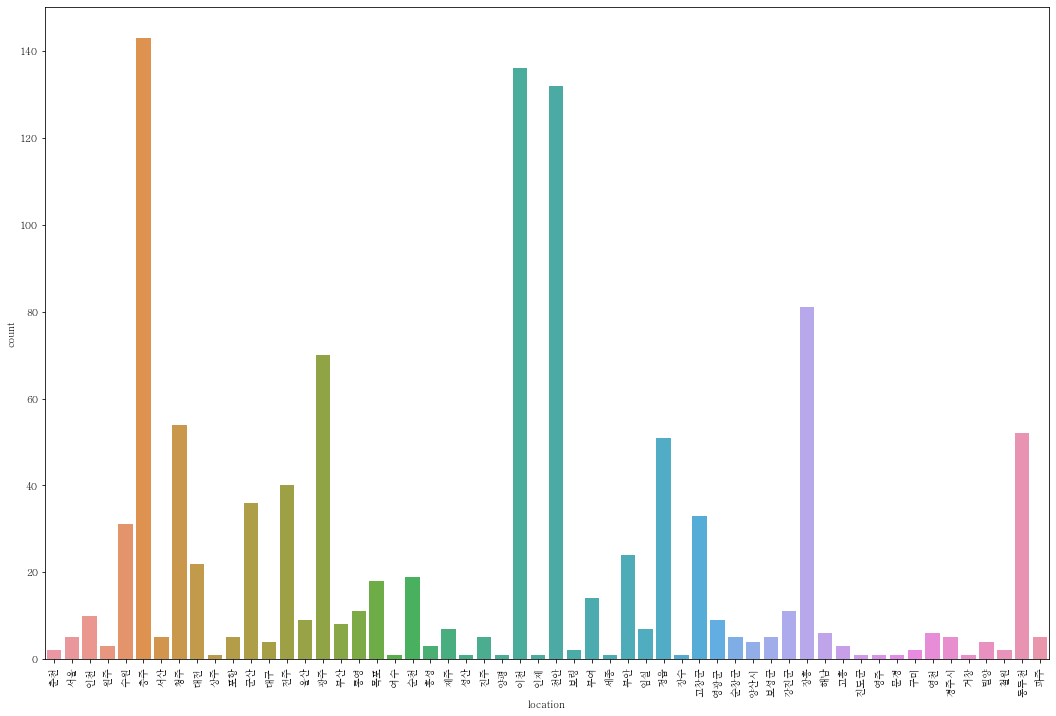

In [121]:
f, ax = plt.subplots(1, figsize=(18,12))

fontname = 'C:\\WINDOWS\\Fonts\\batang.ttc'
fontname = font_manager.FontProperties(fname=fontname).get_name()

sns.countplot(hpai1.location)
plt.xticks(rotation=90)

In [130]:
hpai_list={}
for n1, group in hpai1.groupby('location'):
    group=group.sort_values('발생일') # 발생일순 정렬
    group.reset_index(drop=True, inplace=True)
    hpai_list[n1]=group

In [131]:
hpai_list.keys()

dict_keys(['강진군', '거창', '경주시', '고창군', '고흥', '광주', '구미', '군산', '대구', '대전', '동두천', '목포', '문경', '밀양', '보령', '보성군', '부산', '부안', '부여', '상주', '서산', '서울', '성산', '세종', '수원', '순창군', '순천', '양산시', '양평', '여수', '영광군', '영주', '영천', '울산', '원주', '이천', '인제', '인천', '임실', '장수', '장흥', '전주', '정읍', '제주', '진도군', '진주', '천안', '철원', '청주', '춘천', '충주', '통영', '파주', '포항', '해남', '홍성'])

In [132]:
hpai_list['강진군']

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,전라남도 강진군 성전면 금당리,오리-육용오리,1,20140504,259,강진군,12.9,0.4,2.6,66.9
1,전라남도 강진군 성전면 금당리,오리-종오리,15000,20150428,259,강진군,16.4,46.0,3.1,87.9
2,전라남도 강진군 칠량면 삼흥리,오리-육용오리,6850,20150914,259,강진군,18.9,0.0,1.7,71.8
3,전라남도 강진군 강진읍 덕남리,닭-기타,60,20150921,259,강진군,20.8,0.0,1.6,83.1
4,전라남도 강진군 신전면 송천리,오리-육용오리,8800,20170226,259,강진군,3.7,0.0,2.0,64.0
5,전라남도 강진군 도암면 석문리,오리-육용오리,22400,20170305,259,강진군,7.0,0.0,1.9,62.9
6,전라남도 강진군 도암면 석문리,오리-종오리,8000,20170306,259,강진군,3.4,0.0,5.0,46.0
7,전라남도 강진군 도암면 석문리,오리-육용오리,40000,20170306,259,강진군,3.4,0.0,5.0,46.0
8,전라남도 강진군 성전면 금당리,오리-종오리,16800,20170309,259,강진군,6.8,0.0,3.8,49.5
9,전라남도 강진군 작천면 갈동리,오리-종오리,22000,20180104,259,강진군,0.3,0.0,3.0,55.5


In [135]:
hpai_list

{'강진군':                   주소       축종   사육두수       발생일 지역코드 location  \
 0   전라남도 강진군 성전면 금당리  오리-육용오리      1  20140504  259      강진군   
 1   전라남도 강진군 성전면 금당리   오리-종오리  15000  20150428  259      강진군   
 2   전라남도 강진군 칠량면 삼흥리  오리-육용오리   6850  20150914  259      강진군   
 3   전라남도 강진군 강진읍 덕남리     닭-기타     60  20150921  259      강진군   
 4   전라남도 강진군 신전면 송천리  오리-육용오리   8800  20170226  259      강진군   
 5   전라남도 강진군 도암면 석문리  오리-육용오리  22400  20170305  259      강진군   
 6   전라남도 강진군 도암면 석문리   오리-종오리   8000  20170306  259      강진군   
 7   전라남도 강진군 도암면 석문리  오리-육용오리  40000  20170306  259      강진군   
 8   전라남도 강진군 성전면 금당리   오리-종오리  16800  20170309  259      강진군   
 9   전라남도 강진군 작천면 갈동리   오리-종오리  22000  20180104  259      강진군   
 10  전라남도 강진군 성전면 금당리   오리-종오리   5900  20180110  259      강진군   
 
     avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)  
 0                 12.9             0.4            2.6               66.9  
 1                 16.4            46.0            3.1     

In [153]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

In [ ]:
#def bar_chart(feature):
    #survived = hpai1[hpai1['발생일']==1][feature].value_counts()
    #dead = train_df[train_df['survived']==0][feature].value_counts()
    #df = pd.DataFrame([survived,dead])
    #df.index = ['survived','dead']
    #df.plot(kind='bar',stacked=True)
#'feature' 부분에 각 데이터를 넣으면 'survived'와 'feature'의 관계 차트가 나옵니다.

In [147]:
hpai_df = pd.DataFrame(hpai_list, columns=location)

NameError: name 'location' is not defined

In [73]:
hpai['Counts'] = hpai.groupby(['지역코드'])['location'].transform('count')

In [123]:
hpai1

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
...,...,...,...,...,...,...,...,...,...,...
8,경기도 고양시 덕양구 관산동,닭-토종닭,3000,20170303,99,파주,1.2,0.0,1.8,68.6
184,경기도 파주시 적성면 어유지리,닭-산란계,130000,20210126,99,파주,2.0,0.8,0.9,90.5
183,경기도 파주시 법원읍 갈곡리,닭-일괄,1600,20170603,99,파주,19.0,0.0,1.5,48.0
182,경기도 파주시 광탄면 창만리,닭-산란계,7000,20110118,99,파주,-11.6,0.0,0.8,64.4


In [75]:
hpai.to_csv("지역별 날씨.csv", encoding='utf-8-sig', index=False)

In [28]:
code = pd.read_excel('data/localcode.xlsx')
code

,지점,지점명
0,90,속초
1,93,북춘천
2,95,철원
3,98,동두천
4,99,파주
...,...,...
90,285,합천
91,288,밀양
92,289,산청
93,294,거제


In [30]:
code1=code.drop(['지점명'], axis=1)
code1

,지점
0,90
1,93
2,95
3,98
4,99
...,...
90,285
91,288
92,289
93,294
